In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
from numpy.random import shuffle
from matplotlib import pyplot as plt

sns.set({'figure.figsize':(8, 8)})


def error(f, x, y):
    return sp.sum((f(x) - y)**2)


def labels():
    plt.xlabel('Time')
    plt.ylabel('Visitors')
    plt.legend(['N. of visitors'])

    
# generating fake data
x = np.arange(0, 100, 1)
y = np.array([21.5 * i + 100 + 1250*np.random.random() for i in range(100)])
y[y < 1500] = np.array([i + 2500*np.random.random() for i in y[y < 1500]])


# plotting
plt.scatter(x, y)
labels()

fp1, res, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

plt.plot(x, fp1[0]*x + fp1[1], color='orange', linewidth=5)
plt.show()

print(res, error(lambda i: fp1[0]*i + fp1[1], x, y), error(sp.poly1d(fp1), x, y) )

<Figure size 800x800 with 1 Axes>

[34356982.70811263] 34356982.70811263 34356982.70811263


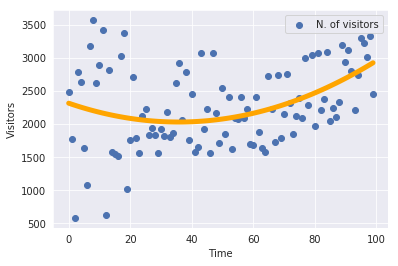

31598305.01791399


In [2]:
fp2 = sp.polyfit(x, y, 2)

f2 = sp.poly1d(fp2)

plt.scatter(x, y)
labels()
plt.plot(x, f2(x), linewidth=5,color='orange')
plt.show()

print(error(f2, x, y))

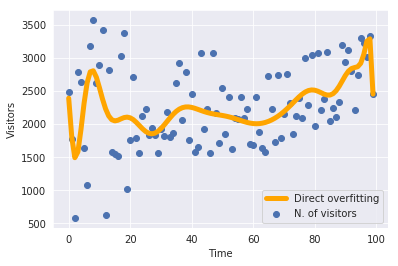

In [3]:
plt.scatter(x, y)
labels()
plt.plot(x,
         sp.poly1d(sp.polyfit(x, y, 18))(x),
         linewidth=5,
         color='orange')
plt.legend(['Direct overfitting','N. of visitors'])
plt.show()

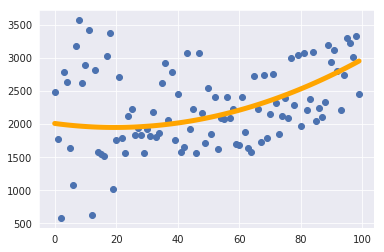

20658150.024679698
12231576.677583793


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3)

coeffs = sp.polyfit(X_train, y_train, 2)
predict = sp.poly1d(coeffs)

plt.scatter(x, y)
plt.plot(x, predict(x), color='orange', linewidth=5)
plt.show()

print(error(predict, X_train, y_train))
print(error(predict, X_test, y_test))

In [10]:
from scipy.optimize import fsolve

# y=100000, x=? 
print(f2 - 100000)
print(fsolve(f2 - 100000, 800) / (7*24) )

        2
0.2229 x - 15.91 x - 9.769e+04
[4.15874592]
